# Imports

In [1]:
%pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 468.0 kB/s eta 0:00:00


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import keras
import keras_tuner as kt
from scipy.stats import randint

# Examining Data

In [25]:
dataset = pd.read_csv("https://raw.githubusercontent.com/NikitasThermos/ML-Projects/refs/heads/main/Project%201/fetal_health.csv")

In [ ]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


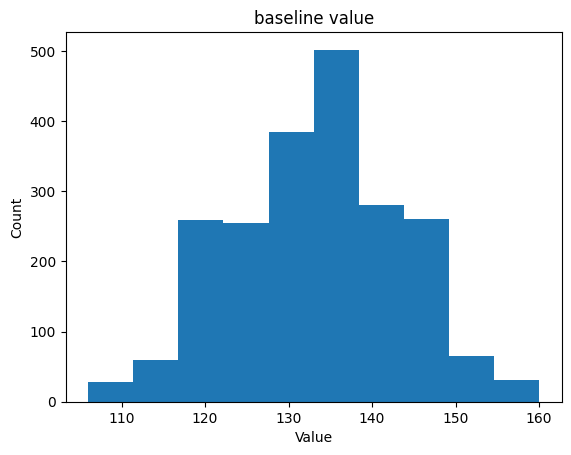

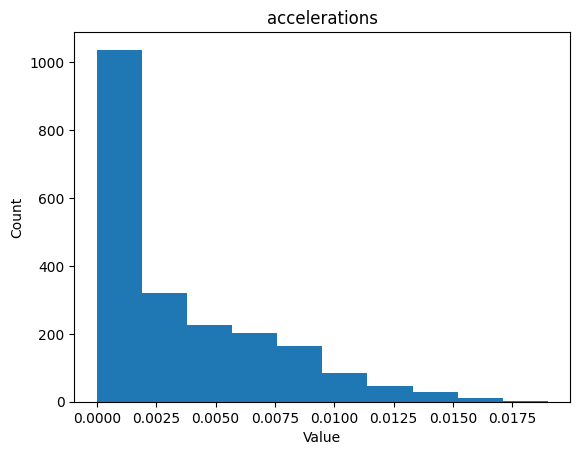

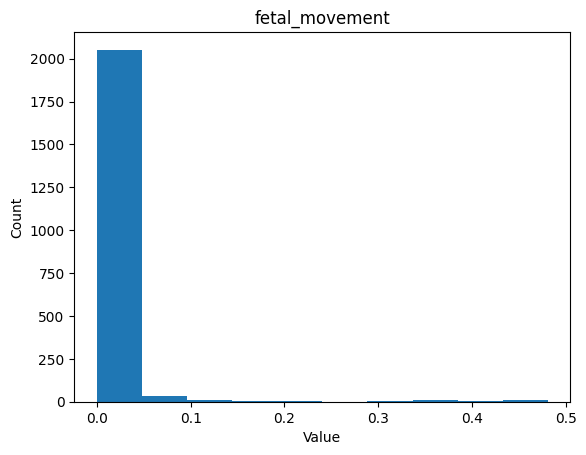

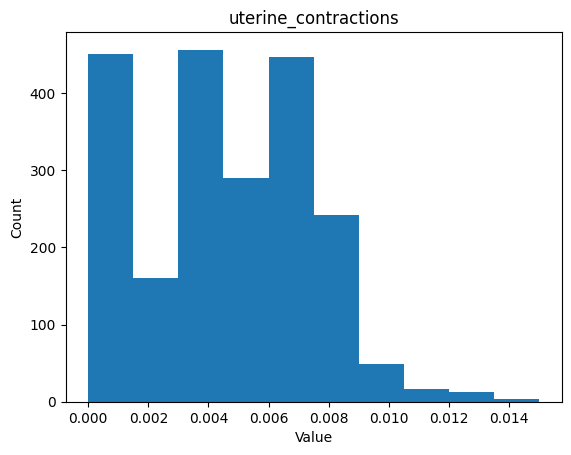

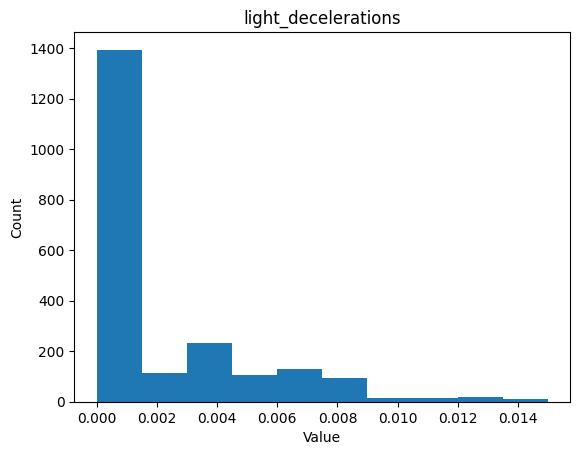

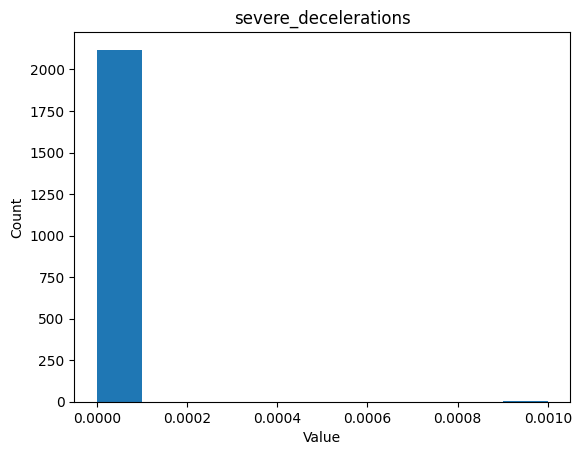

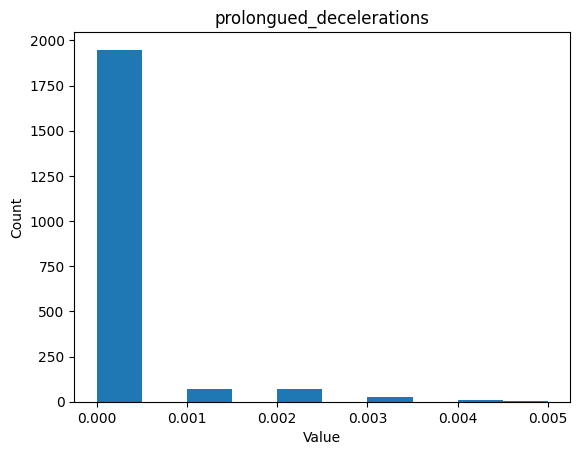

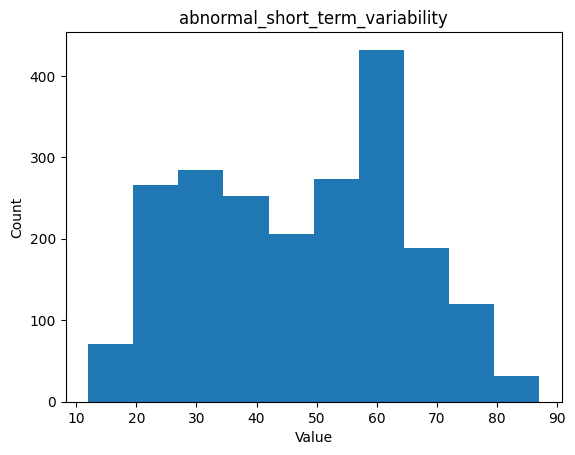

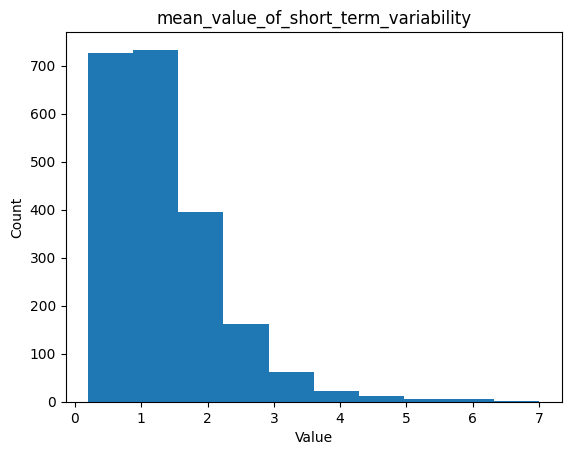

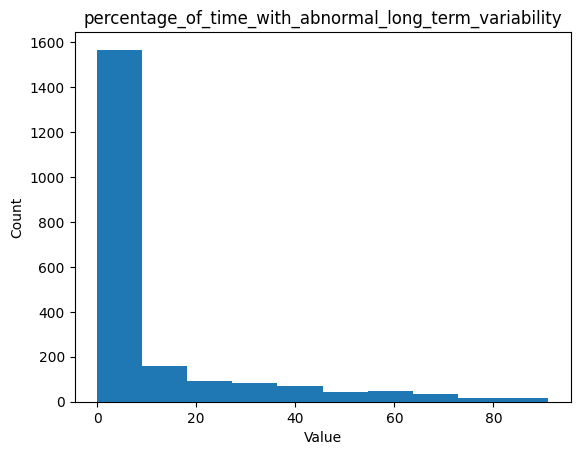

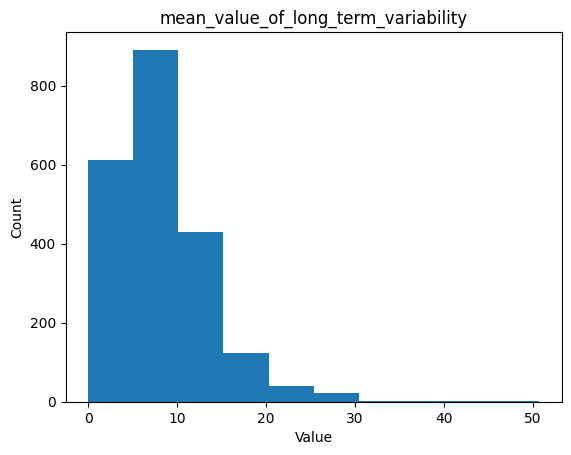

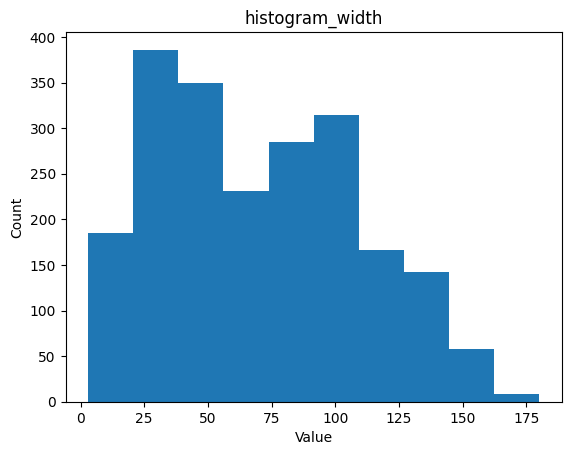

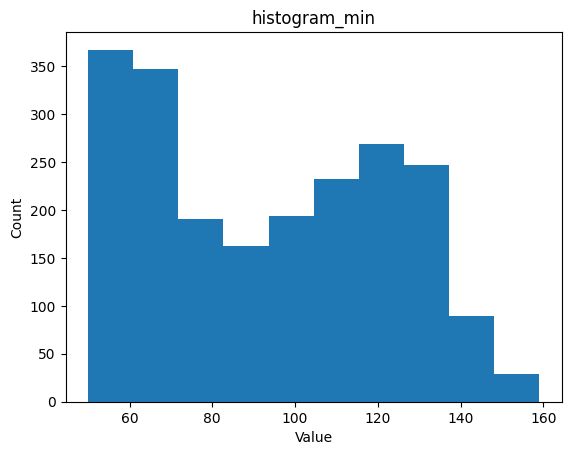

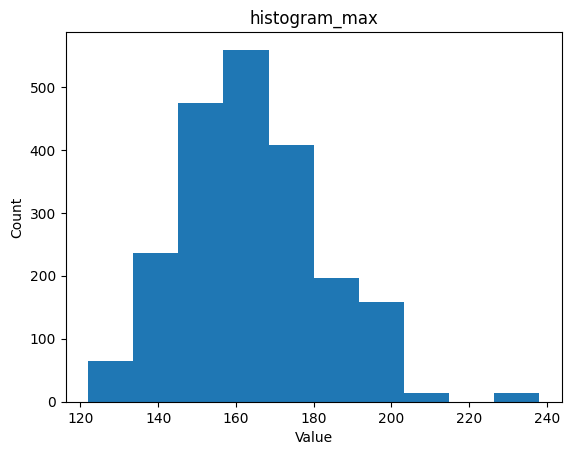

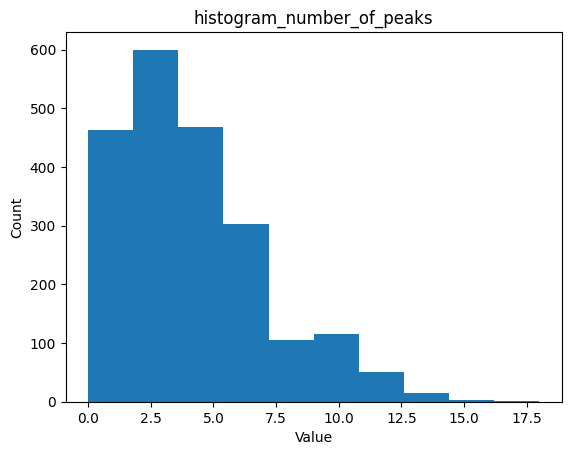

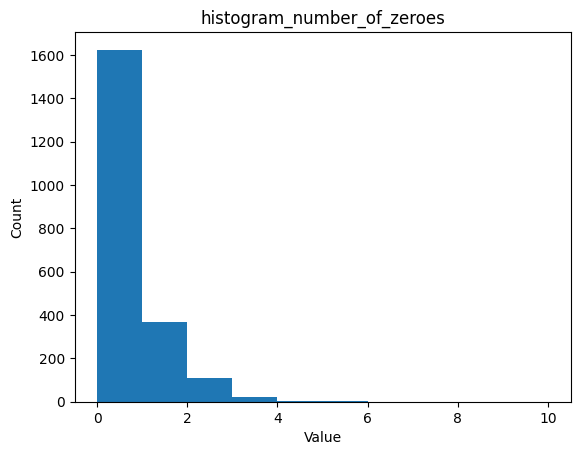

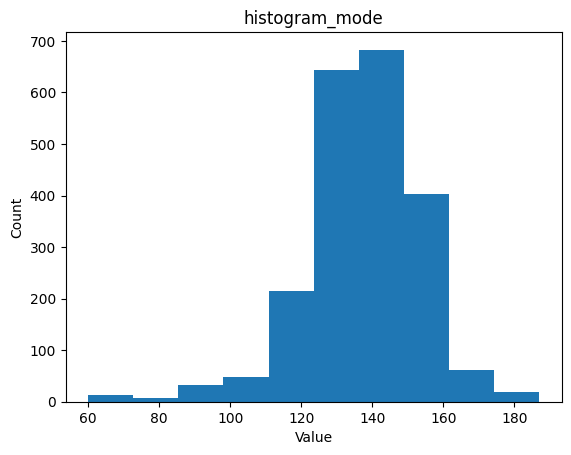

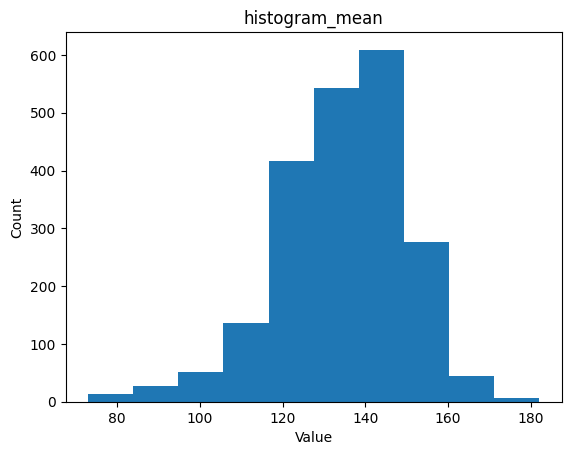

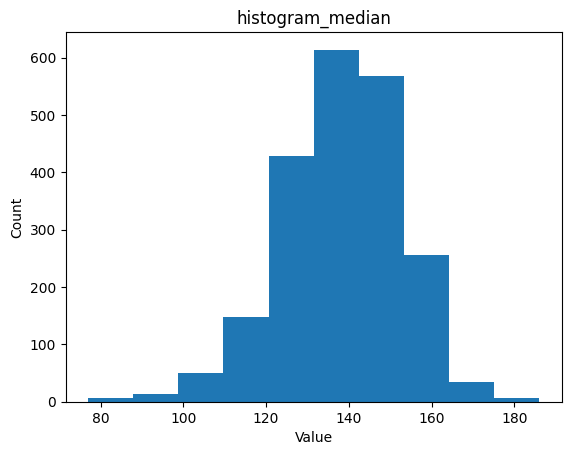

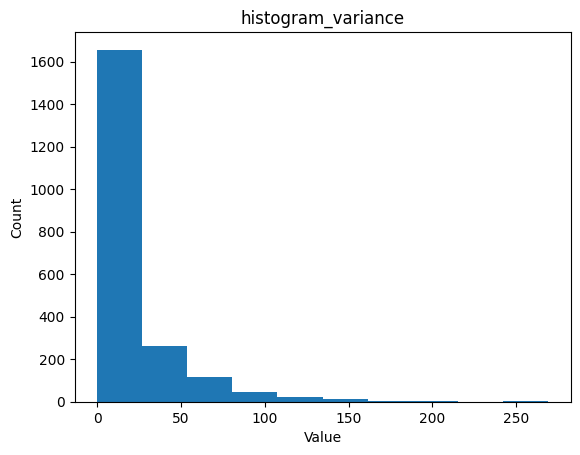

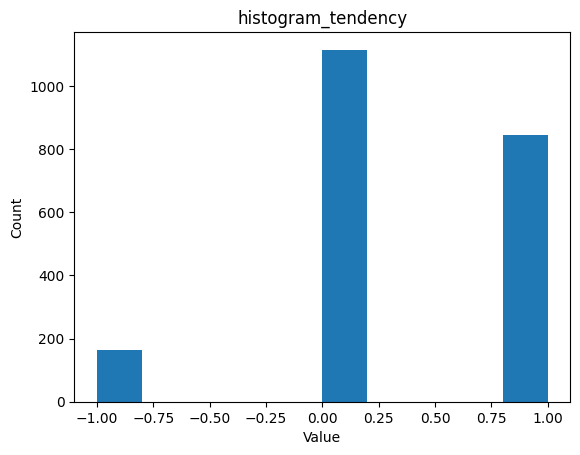

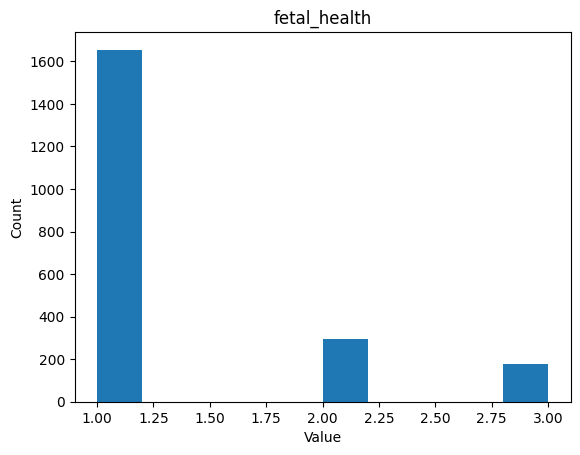

In [ ]:
for col in dataset.columns:
 plt.figure()
 plt.hist(dataset[col])
 plt.title(col)
 plt.xlabel("Value")
 plt.ylabel("Count")
 plt.show()



In [ ]:
print(f'Number of total instances: {dataset.shape[0]}')
print(f'Number of 1 Class instances: {np.sum(dataset["fetal_health"] == 1)}')
print(f'Number of 2 Class instances: {np.sum(dataset["fetal_health"] == 2)}')
print(f'Number of 3 Class instances: {np.sum(dataset["fetal_health"] == 3)}')

Number of total instances: 2126
Number of 1 Class instances: 1655
Number of 2 Class instances: 295
Number of 3 Class instances: 176


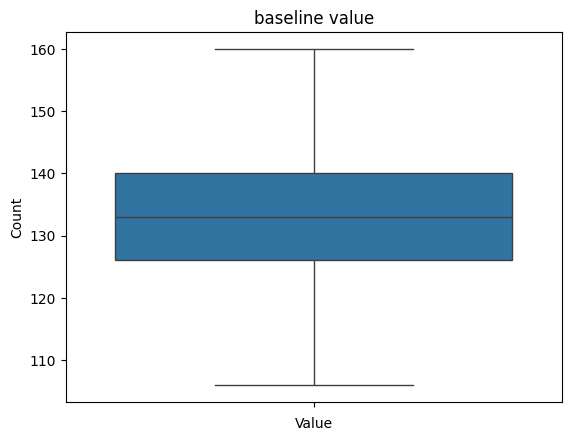

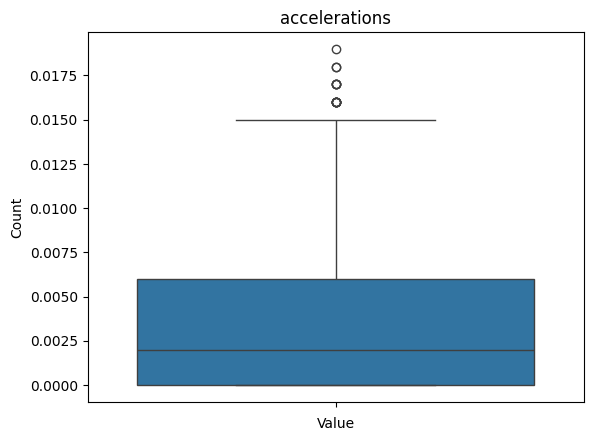

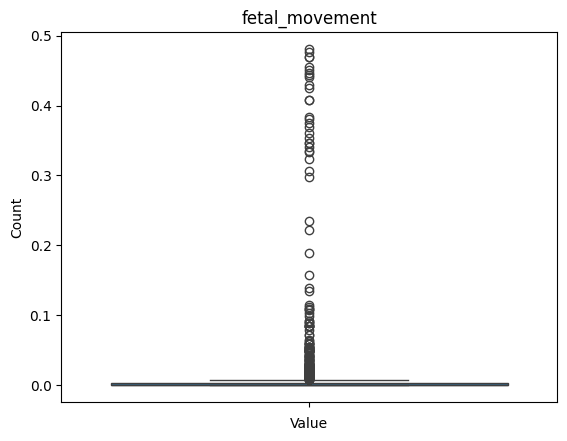

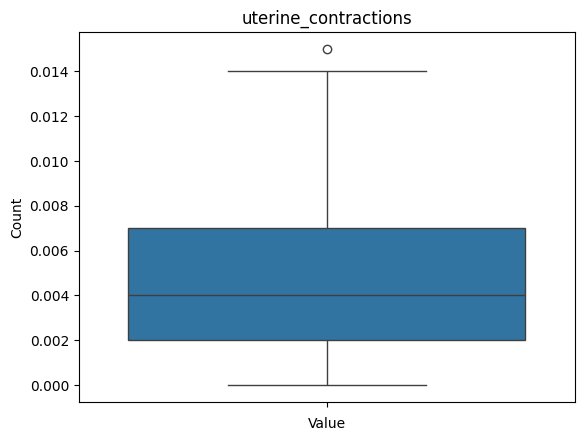

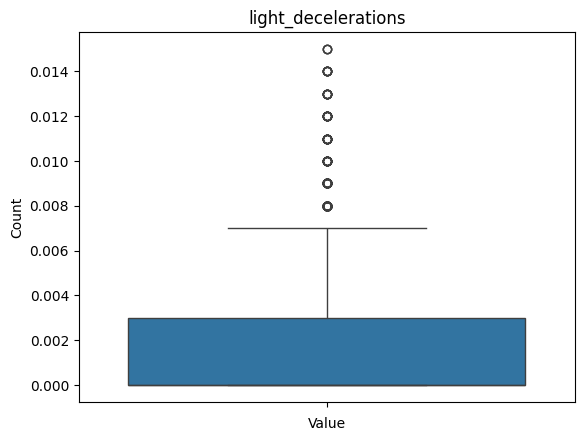

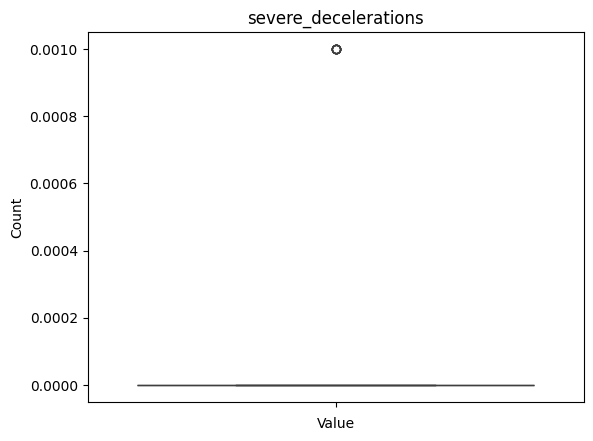

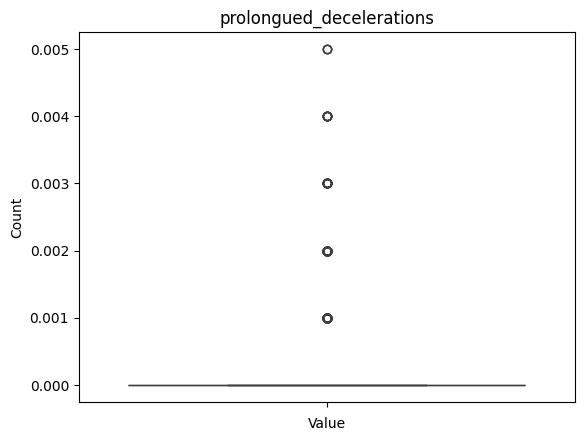

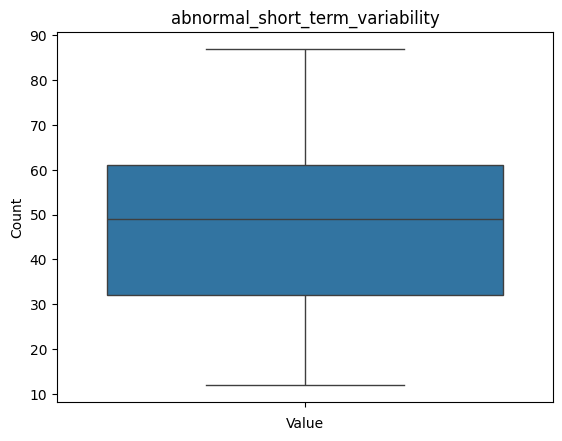

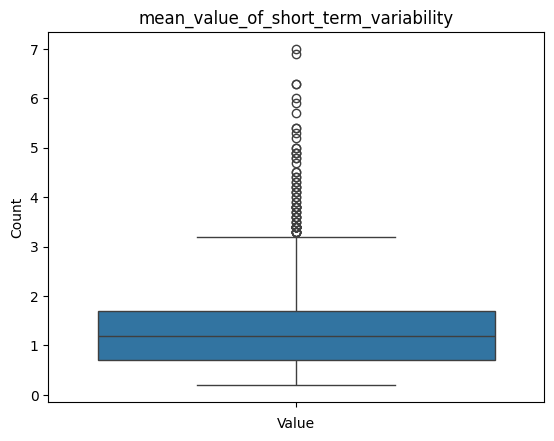

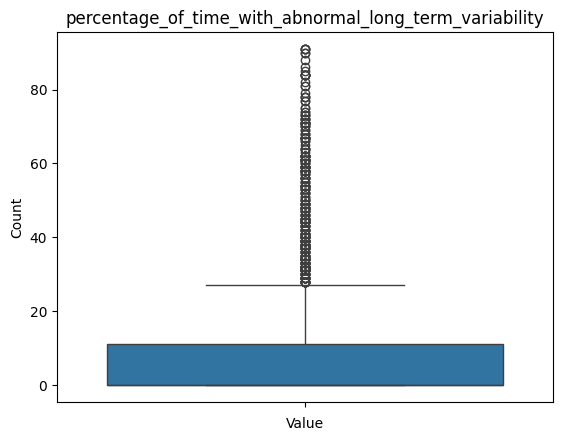

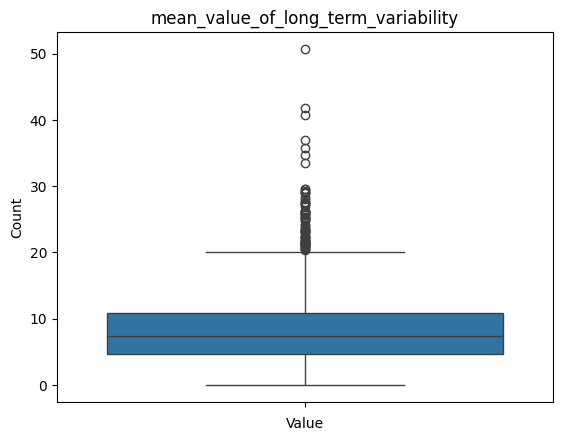

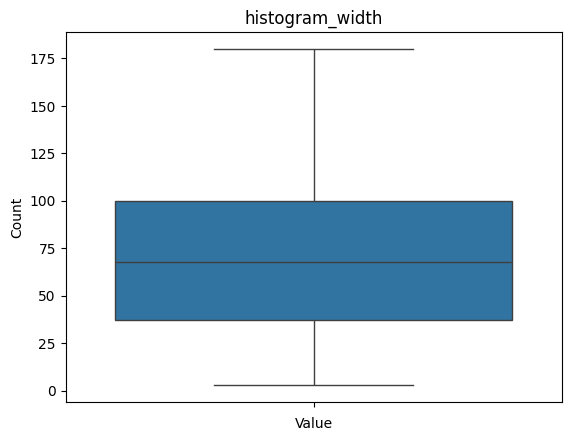

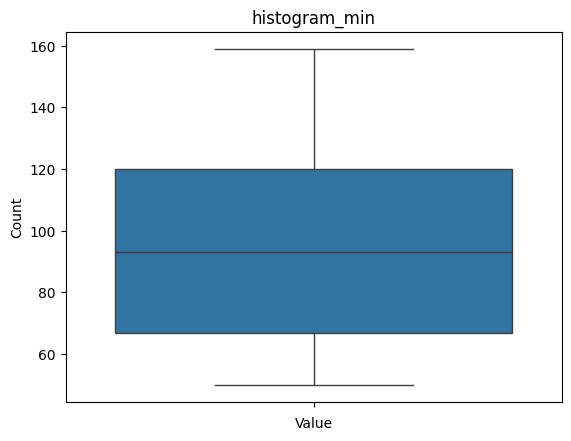

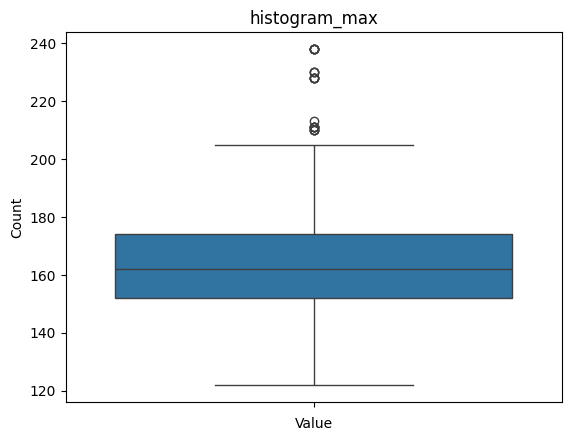

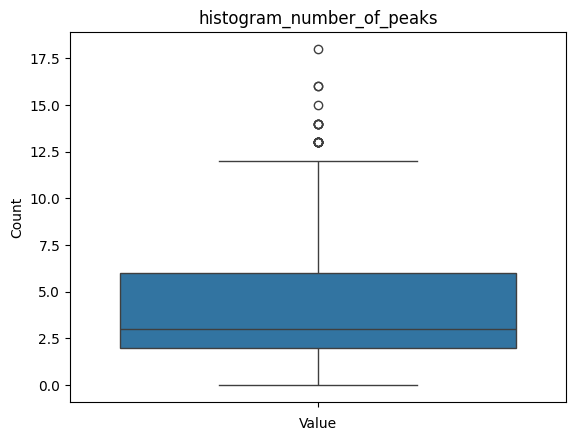

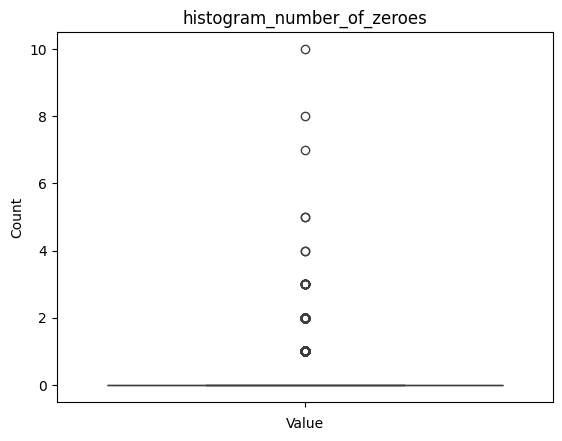

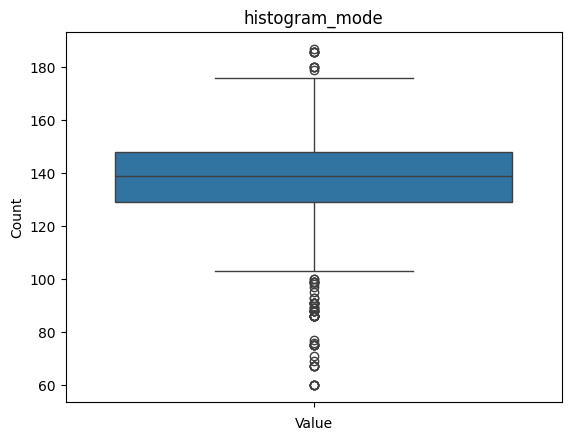

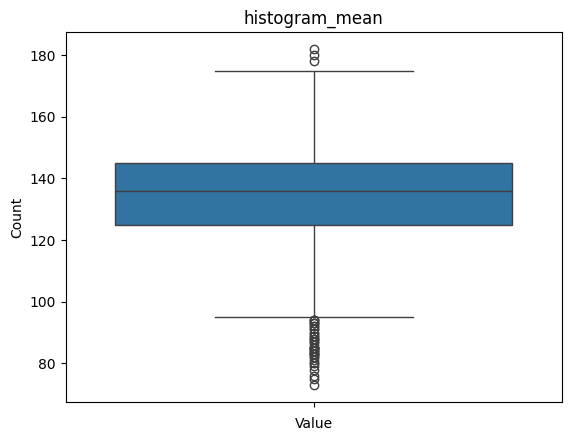

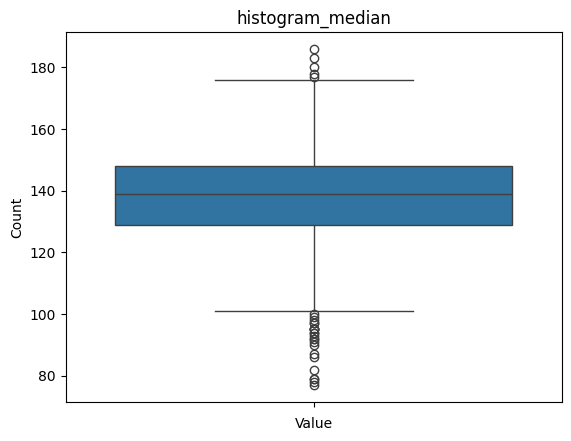

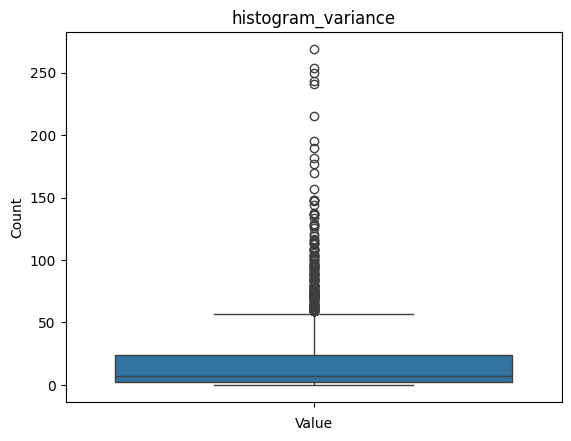

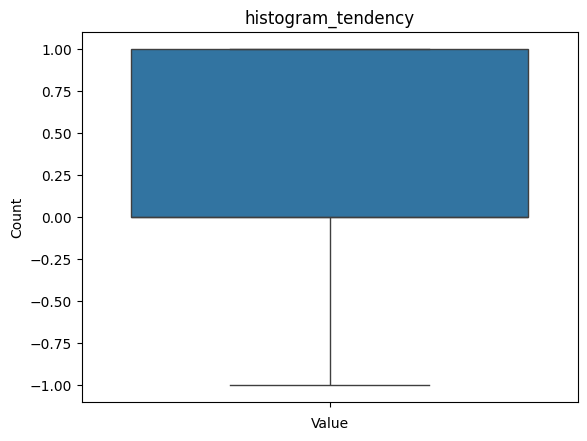

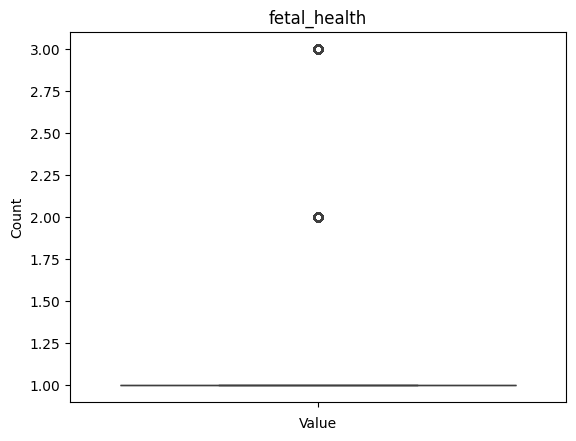

In [ ]:
for col in dataset.columns:
 plt.figure()
 sns.boxplot(data=dataset[col])
 plt.title(col)
 plt.xlabel("Value")
 plt.ylabel("Count")
 plt.show()

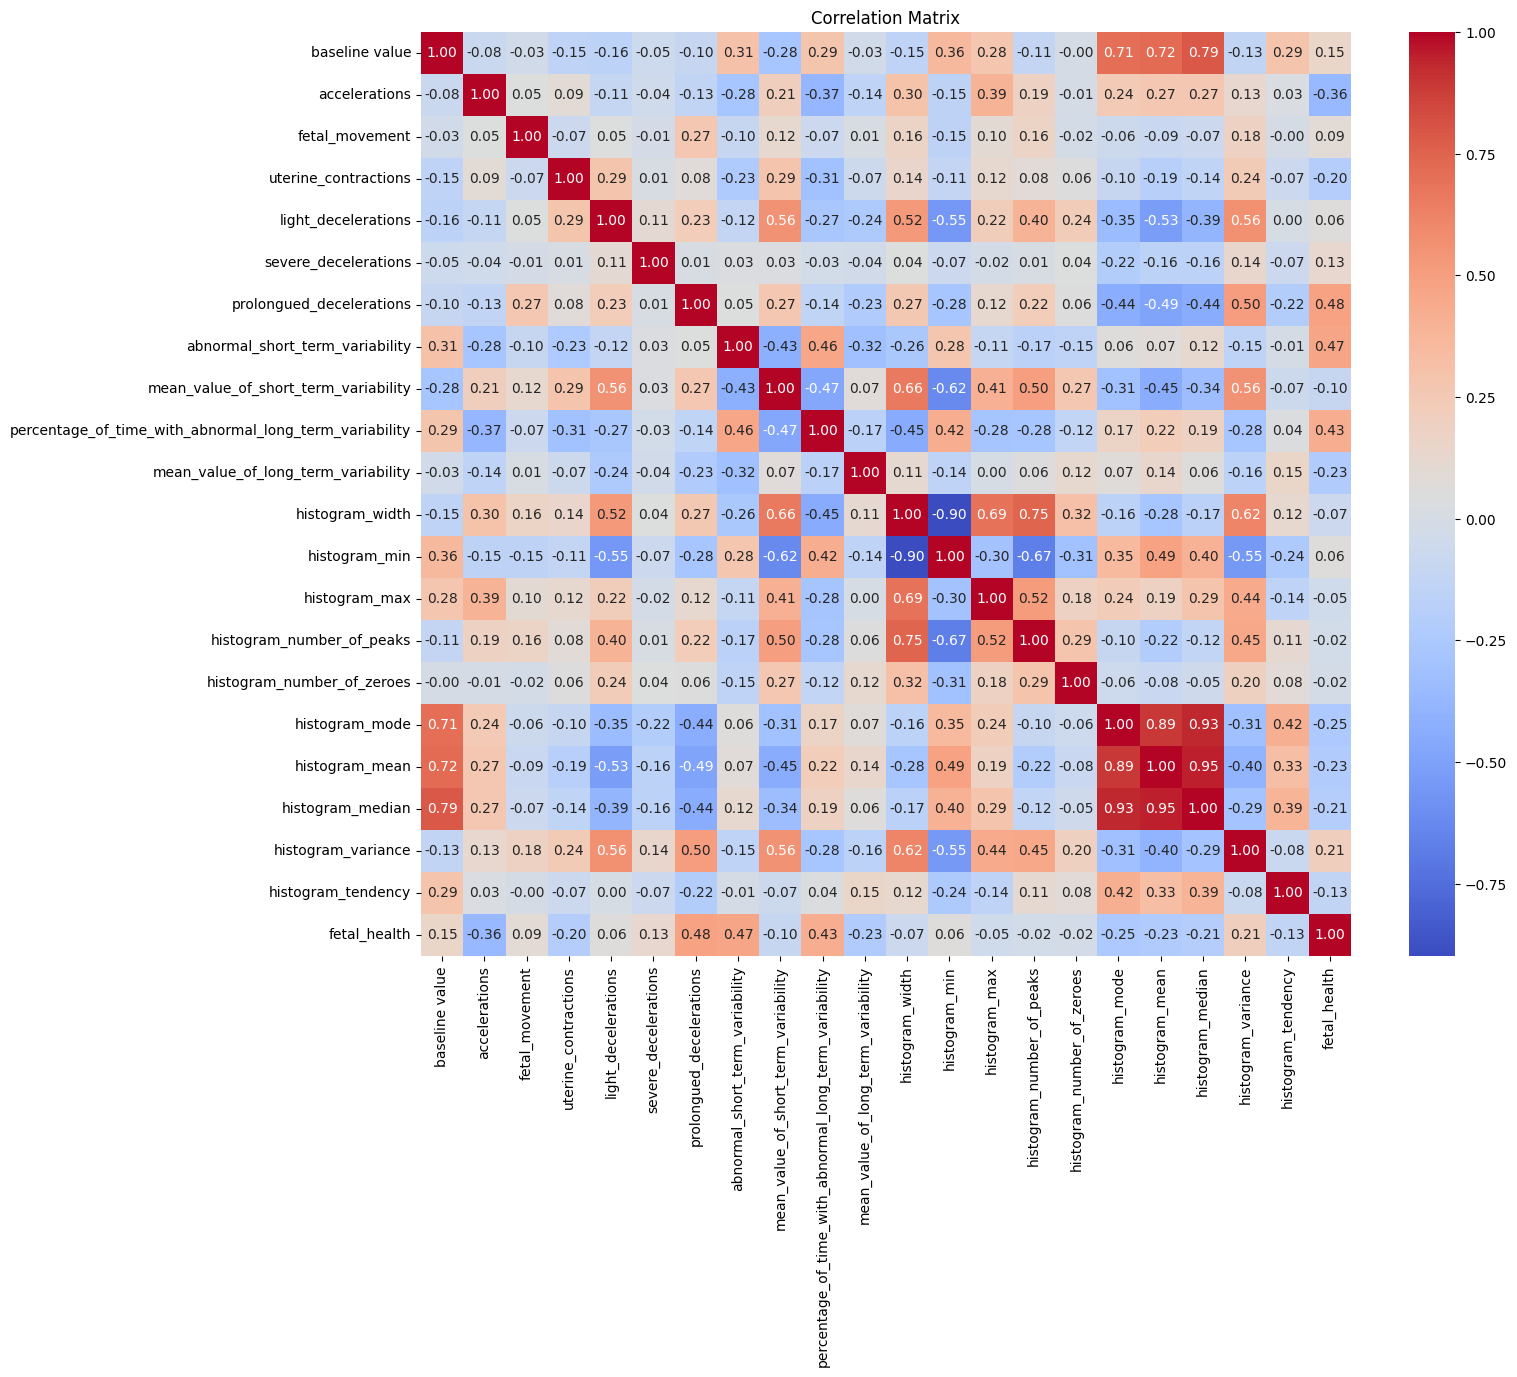

In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [26]:
training_df, labels = dataset.drop('fetal_health', axis=1), dataset['fetal_health']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(training_df, labels, test_size=0.3, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
y_train_oh = tf.one_hot(y_train-1, depth=3)
y_test_oh = tf.one_hot(y_test-1, depth=3)

# Linear Models

In [34]:
def run_linear_sklearn(X_train, y_train, X_test, y_test):
    model = LogisticRegression(penalty=None, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = metrics.accuracy_score(y_test, y_pred)
    conf = metrics.confusion_matrix(y_test, y_pred)
    return ac, conf

In [35]:
ac, conf = run_linear_sklearn(X_train_std, y_train, X_test_std, y_test)
print(f'Accuracy: {ac}')
print(f'Confusion Matrix: {conf}')

Accuracy: 0.8746081504702194
Confusion Matrix: [[462  29   5]
 [ 23  63  15]
 [  3   5  33]]


In [95]:
def run_linear_tf(X_train, y_train, X_test, y_test):
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=2000).batch(32)
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

    model = keras.Sequential([
        keras.layers.Dense(3, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_dataset, epochs=50)
    score = model.evaluate(test_dataset)
    pred = model.predict(test_dataset)
    pred_idx = np.argmax(pred, axis=1)
    true_idx = np.argmax(y_test, axis=1)
    conf = tf.math.confusion_matrix(true_idx, pred_idx)
    return score, conf

In [96]:
score, conf = run_linear_tf(X_train_std, y_train_oh, X_test_std, y_test_oh)
print(f'Accuracy: {score[1]}')
print(f'Confusion Matrix: {conf}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2082 - loss: 1.8651   
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3239 - loss: 1.3093
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4877 - loss: 0.9853
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7311 - loss: 0.7912
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.6593
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.5990
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.5363
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.4783
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.4679
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8501 - loss: 0.4456
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8710 - loss: 0.4137
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.40

# Neural Network

In [10]:
def run_linear_tf2(X_train, y_train, X_test, y_test):
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=2000).batch(128)
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(3, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_dataset, epochs=100, batch_size=128)
    score = model.evaluate(test_dataset)
    pred = model.predict(X_test)
    pred_idx = np.argmax(pred, axis=1)
    true_idx = np.argmax(y_test, axis=1)
    conf = tf.math.confusion_matrix(true_idx, pred_idx)
    return score, conf

In [11]:
score, conf = run_linear_tf2(X_train_std, y_train_oh, X_test_std, y_test_oh)
print(f'Accuracy: {score[1]}')
print(f'Confusion Matrix: {conf}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6396 - loss: 0.9516
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.5634 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.3337 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.2877 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.2410 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9055 - loss: 0.2215 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9149 - loss: 0.1965 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.1824 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.1614 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9415 - loss: 0.1549 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.1512 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

## Keras Tuner

In [31]:
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=1, max_value=10)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=1000)
  learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-1, sampling="log")
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(3, activation="sigmoid"))

  model.compile(loss="categorical_crossentropy",
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [32]:
X_train = tf.convert_to_tensor(X_train_std, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train_oh, dtype=tf.float32)

X_test = tf.convert_to_tensor(X_test_std, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test_oh, dtype=tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=2000).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='accuracy', patience = 5, mode='max', restore_best_weights = True)
callbacks = [early_stopping_cb]

random_search_tuner = kt.RandomSearch(build_model, objective=kt.Objective(name="accuracy", direction="max"), max_trials = 10,
                                      overwrite=True, seed=42)

random_search_tuner.search(train_dataset, epochs=100,
                           callbacks=callbacks)

Trial 10 Complete [00h 01m 20s]
accuracy: 0.9959677457809448

Best accuracy So Far: 0.9959677457809448
Total elapsed time: 00h 03m 11s


In [33]:
random_search_tuner.get_best_hyperparameters()[0].values

{'n_hidden': 7, 'n_neurons': 912, 'lr': 0.00019724835195225073}

In [34]:
best_model = random_search_tuner.get_best_models()[0]
accuracy = best_model.evaluate(test_dataset)
pred = best_model.predict(test_dataset)
pred_idx = np.argmax(pred, axis=1)
true_idx = np.argmax(y_test, axis=1)
conf = tf.math.confusion_matrix(true_idx, pred_idx)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9217 - loss: 0.3814


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [35]:
print(f'Accuracy: {accuracy[1]}')
print(f'Confusion Matrix: {conf}')

Accuracy: 0.9153605103492737
Confusion Matrix: [[481  15   0]
 [ 25  68   8]
 [  4   2  35]]


# Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': randint(low=20, high=500),
    'max_depth': randint(low=1, high=15),
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
)

random_search.fit(X_train_std, y_train)
random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 13,
 'n_estimators': 290}

In [30]:
y_pred = random_search.predict(X_test_std)

print(f'accuracy{metrics.accuracy_score(y_test, y_pred)}')
print(f'confusion matrix{metrics.confusion_matrix(y_test, y_pred)}')

accuracy0.9467084639498433
confusion matrix[[488   6   2]
 [ 20  78   3]
 [  2   1  38]]
